# Career Foundry Exercise 6.4 - Supervised Machine Learning: Regression
#### Gabriel Pollicar, December 22 , 2023

### _________________________________________________________________

## Contents List:

### - Importing Libraries and Datasets

### - 5. Wrangling Project Data
### - 6. Clean Data Sets of Extreme Values
### - 7. Create Chloropleth Maps
### - 8. Answer Analysis Questions

### - Exporting Datasets

### _________________________________________________________________


## Importing Libraries

In [152]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy
import folium 
import json
import geopandas as gpd

In [153]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

## Importing Datasets

In [154]:
# Importing the realtor data 
# This dataset holds all initial columns remaining from the dataset at the end of Part I, 
path = r'C:\Users\polli\Career Foundry Python'
realtor_data = pd.read_csv(os.path.join(path, 'Exercise 6.1','02 Data', 'realtor-data_Cleaned.csv'))

In [155]:
# Checking realtor data
realtor_data.shape

(73963, 11)

In [113]:
# Import ".json" file for the U.S. States

country_geo = r'C:\Users\polli\Career Foundry Python/Exercise 6.3/02 Data/JSON files/us-states.json'
gdf_state = gpd.read_file(country_geo)

In [114]:
# Checking json file

gdf_state.head()

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


## 01. Data Cleaning

In [117]:
# Fix columns in realtor data

realtor_data.columns

Index(['Unnamed: 0', 'status', 'bed', 'bath', 'acre_lot', 'city', 'state',
       'zip_code', 'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [118]:
# fix extra column
realtor_data = realtor_data.drop('Unnamed: 0', axis=1)

In [119]:
realtor_data.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [120]:
# Check for null values 
# prev_sold_date missing vals are kept since this attribute is not investigated

realtor_data.isnull().sum()

status                0
bed                   0
bath                  0
acre_lot              0
city                  0
state                 0
zip_code              0
house_size            0
prev_sold_date    28772
price                 0
dtype: int64

## 6. Removing Extreme Values

In [122]:
# Check how many extreme values in Price

realtor_data[realtor_data['price'] >100000000]

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
50759,for_sale,6.00,9.00,0.79,New York City,New York,10022.00,8255.00,NaN,169000000.00


<Axes: xlabel='price', ylabel='Count'>

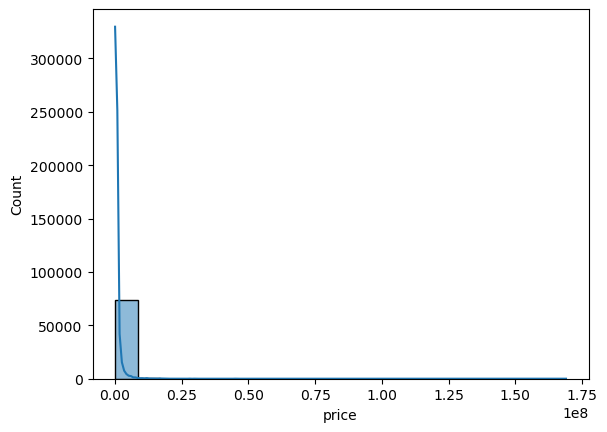

In [121]:
# Removing Extreme values from Price

sns.histplot(realtor_data['price'], bins=20, kde = True) 

In [123]:
# For this analysis, I want to analyze the majority of homes, especially for middle class incomes, 
# The top middle class income could be considered $150-200k in which they would be able to afford less than $1 million dollar house price

realtor_data_cleanprice = realtor_data[realtor_data['price'] < 1000000]

<Axes: xlabel='price', ylabel='Count'>

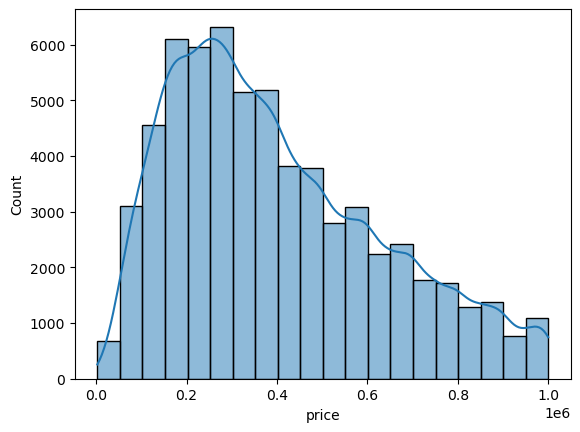

In [124]:
# histplot shows subsetted data of middle class affordable housing

sns.histplot(realtor_data_cleanprice['price'], bins=20, kde = True) 

# Result shows a much more comprehensive view of housing prices affordable to the broad range of middle class

<Axes: xlabel='acre_lot', ylabel='Count'>

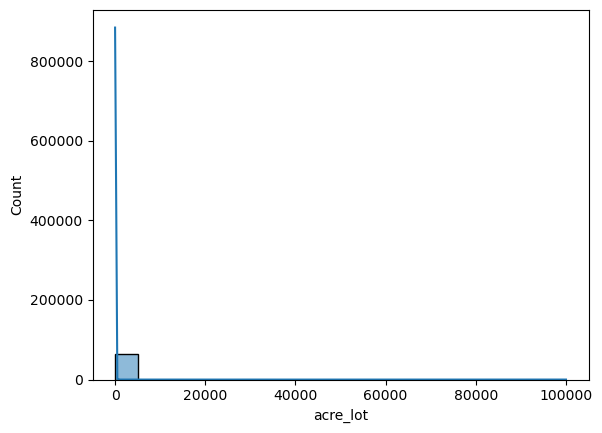

In [125]:
# Removing Extreme values from acreage

sns.histplot(realtor_data_cleanprice['acre_lot'], bins=20, kde = True) 

<Axes: xlabel='acre_lot', ylabel='Count'>

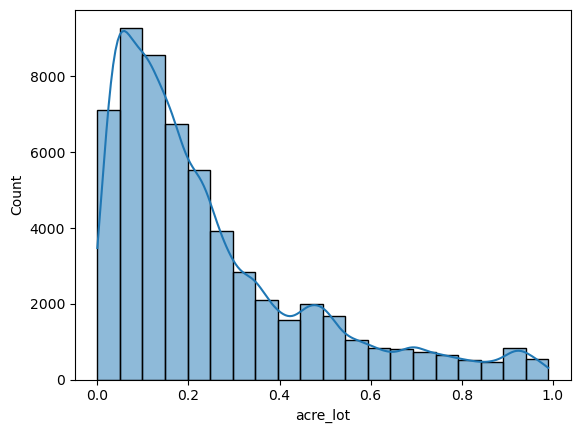

In [126]:
# Removes properties with large acreages

# For my analysis, I am looking for attributes that affect prices of middle class houses
# Some properties listed are large estates or large acre lots for development

# 1 Acres was chosen as the maximum since most urban to suburban homes are less than 1 acre 
# Source: https://www.visualcapitalist.com/cp/the-median-lot-size-in-every-american-state-2022/
# Removing Extreme values from acreage
realtor_data_cleanpriceAcre = realtor_data[realtor_data['acre_lot'] < 1]
sns.histplot(realtor_data_cleanpriceAcre['acre_lot'], bins=20, kde = True) # shows extreme values for 'fat' = realtor_data_cleanprice[realtor_data_cleanprice['acre_lot'] < 1]


<Axes: xlabel='house_size', ylabel='Count'>

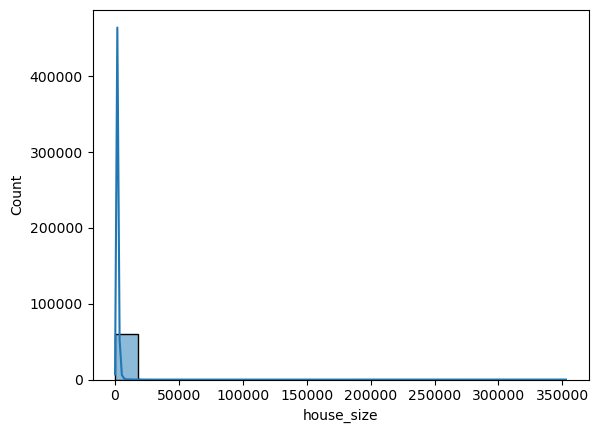

In [135]:
# Removing Extreme values for number of beds,

sns.histplot(realtor_data_cleanprice['house_size'], bins=20, kde = True) # shows extreme values for 'fat'

<Axes: xlabel='house_size', ylabel='Count'>

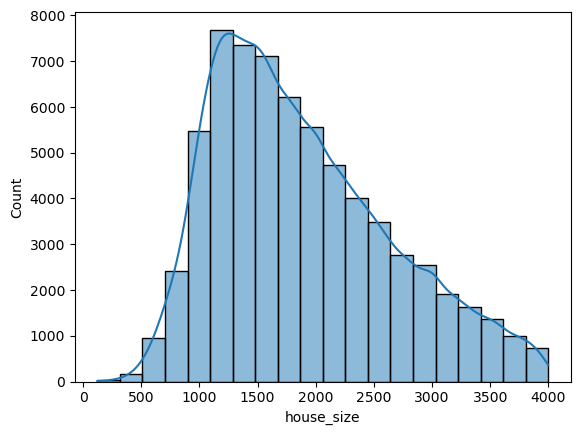

In [137]:
# Removes properties with large acreages

# For my analysis, I am looking for attributes that affect prices of middle class houses
# Some properties listed are large estates or large acre lots for development

# 4,000 square feet was chosen as the maximum since most urban to suburban homes are less than 3,000 square feet of floor space
# Source: https://www.financialsamurai.com/the-ideal-house-size-and-layout-to-raise-a-family/#:~:text=Owning%20a%20house%20equal%20to,for%20a%20family%20of%20four.
# Removing Extreme values from house size
realtor_data_cleanpriceAcre = realtor_data[realtor_data['house_size'] < 4000]
sns.histplot(realtor_data_cleanpriceAcre['house_size'], bins=20, kde = True)


## 3. Create Chloropleth Maps

In [140]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [141]:
realtor_data_cleanAcrePrice.describe()

,Unnamed: 0,bed,bath,acre_lot,zip_code,house_size,price
count,50795.00,50795.00,50795.00,50795.00,50795.00,50795.00,50795.00
mean,653610.25,3.51,2.25,0.24,9984.03,1921.90,387309.90
std,413300.66,1.41,0.99,0.22,5243.12,2421.21,230055.45
min,0.00,1.00,1.00,0.00,601.00,122.00,3900.00
25%,386932.50,3.00,2.00,0.09,6471.00,1240.00,207000.00
50%,628144.00,3.00,2.00,0.17,8904.00,1637.00,337000.00
75%,1015139.00,4.00,3.00,0.33,13104.00,2213.00,529999.00
max,1401063.00,38.00,18.00,0.99,95000.00,400149.00,999999.00


#### The folium map generated only presents states in the Northern East Coast (and Wyoming) since these are the states included in the data set. So this analysis will investigate relationships only in the East Coast states.

In [146]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = realtor_data_cleanAcrePrice,
    columns = ['state', 'price'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "price").add_to(map)
folium.LayerControl().add_to(map)

map

In [147]:
map.save('plot_data.html')

In [148]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = realtor_data_cleanAcrePrice,
    columns = ['state', 'acre_lot'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Acreage").add_to(map)
folium.LayerControl().add_to(map)

map

In [149]:
map.save('Acreageby_State.html')

In [150]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = realtor_data_cleanpriceAcre,
    columns = ['state', 'house_size'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Gross Floor Space").add_to(map)
folium.LayerControl().add_to(map)

map

In [151]:
map.save('FloorSpaceby_State.html')

## 8. Discuss the Results 

### A. Does the Analysis answer any of your existing research questions?

**Key Question 4:** Are there specific regions or ZIP codes where housing prices tend to be higher or lower?

Based on the chloropleth map that shows prices per state, it seems that middle class houses are more expensive on average in small states with dense cities. These are the common factors in states such as New Jersey and Rhode Island where prices are the highest and they have relatively low land mass. This could be attributed to the fact that both states are mostly urban, while New York which has much higher prices in urban areas like NYC are offsetted by lower prices in its large rural areas.This can be checked by further investigation. 

**Key Question 6:** Do larger properties or homes tend to have higher listing or sold prices?

The chloropleth map shows similarities between the average gross floor plan and average listing prices. For example, Vermont and Massachussetts both have high average housing prices and have high average floor plans. So in these states, their houses on average are larger and are sold more. This is the same for Pennsylvania and West Virginia who have smaller floor plans but lower costs. 

Another observation is that properties based on land acreage has almost no correlation with price. New York, Pennsylvania and Maine are selling larger properties in terms of land but seem to have lower average property listings. This could be attributed to relationships with land area for sale and proximity to popular urban areas. 

**Key Question 7:** What is the spatial distribution of housing prices across different states and cities in the USA?

It seems that housing prices are distributed more closely towards the coastal regions based on the states, states such as West Virginia and Pennsylvania which are landlocked seem to have lower average house prices compared to other states with major ports such as New Jersey and New York. 


### B. Does the analysis lead you to any new research questions?

**Further Investigation into Key Research Question 4:** Are there specific regions or ZIP codes where housing prices tend to be higher or lower?

I would like to further investigate why New York has low average prices compared to other states with popular urban areas such as Massachussetts and New Jersey. My hypothesis is that while New York has NYC as a popular urban area, they also have large rural areas. This may offset the average price of all houses in that state to present a lower average. 

I would then compare different average prices for rural and urban areas in New York and compare. 

**Further Investigation into Key Research Question 6:**

I would also look to see if it is true that larger property listings in terms of land area (acreage) is higher in rural areas where there is more space and land available, and lower in urban areas where some properties, like apartments and condos, take up minimal to small land area. This could contribute to the investigation as to why larger land properties have no correlation to price listings. 